In [25]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes, EfficientSU2
from qiskit.quantum_info import SparsePauliOp

### Sampler

In [84]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.x(1)
circuit.cx(0, 1)
circuit.measure_all()

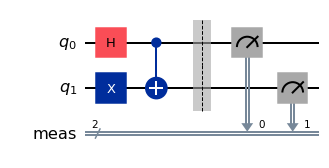

In [85]:
circuit.draw("mpl", style="iqx", filename="circ_meas.pdf")

In [86]:
from qiskit.primitives import Sampler

sampler = Sampler(options={"shots": 100})
job = sampler.run(circuit)
result = job.result()

In [87]:
print(result)

SamplerResult(quasi_dists=[{0: 0.0, 1: 0.63, 2: 0.37, 3: 0.0}], metadata=[{'shots': 100}])


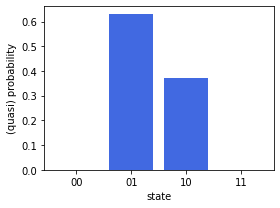

In [99]:
plt.figure(figsize=(4, 3))
plt.bar(range(4), result.quasi_dists[0].values(), color="royalblue")
plt.xticks(range(4), ["00", "01", "10", "11"])
plt.xlabel("state")
plt.ylabel("(quasi) probability")
plt.tight_layout()
plt.savefig("quasis.pdf")

In [56]:
print(result.__repr__()[:64])
print("\t" + result.__repr__()[64:])

SamplerResult(quasi_dists=[{0: 0.0, 1: 0.51, 2: 0.49, 3: 0.0}], 
	metadata=[{'shots': 100}])


## Estimator

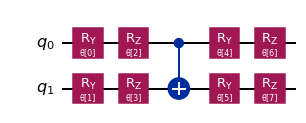

In [57]:
observable = SparsePauliOp(["ZZ"])
ansatz = EfficientSU2(2, reps=1).decompose()
values = np.random.random(ansatz.num_parameters)
ansatz.draw("mpl", style="iqx")

In [58]:
from qiskit.primitives import Estimator

estimator = Estimator()
job = estimator.run(ansatz, observable, values)
result = job.result()

In [59]:
result

EstimatorResult(values=array([0.81675783]), metadata=[{}])

In [60]:
from qiskit.primitives import Estimator

estimator = Estimator()
job = estimator.run(3*[ansatz], 3*[observable], 3*[values])
result = job.result()

In [61]:
print(result)

EstimatorResult(values=array([0.81675783, 0.81675783, 0.81675783]), metadata=[{}, {}, {}])


In [66]:
print(result.__repr__()[:16])
print("\t" + result.__repr__()[16:68])
print("\t" + result.__repr__()[68:])

EstimatorResult(
	values=array([0.81675783, 0.81675783, 0.81675783]), 
	metadata=[{}, {}, {}])


In [40]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



### Different backends

In [68]:
from qiskit.primitives import Sampler

In [ ]:
from qiskit_aer.primitives import Sampler

In [ ]:
from qiskit_ibm_runtime import Sampler

In [ ]:
from qiskit_ibm_runtime import Sampler
from qiskit_ibm_runtime import QiskitRuntimeService, Session

service = QiskitRuntimeService(...)

with Session(service, backend_name) as session:
    sampler = Sampler(session=session)

In [ ]:
from qiskit.primitives import Sampler

sampler = Sampler(options={"shots": 100})
job = sampler.run(circuit)
result = job.result()

In [ ]:
from qiskit_aer.primitives import Sampler

sampler = Sampler(options={"shots": 100})
job = sampler.run(circuit)
result = job.result()

In [ ]:
from qiskit_ibm_runtime import Sampler

sampler = Sampler(execution={"shots": 100})
job = sampler.run(circuit)
result = job.result()

In [ ]:
from qiskit_ibm_runtime import Sampler
from qiskit_ibm_runtime import QiskitRuntimeService, Session

service = QiskitRuntimeService(...)

with Session(service, backend_name) as session:
    sampler = Sampler(session=session, execution={"shots": 100})
    job = sampler.run(circuit)
    result = job.result()

In [ ]:
from your_package import SpecialSampler

sampler = SpecialSampler(options={"shots": 100})
job = sampler.run(circuit)
result = job.result()

### VQE

In [ ]:
estimator = Estimator(options=...)

def energy(theta):
    job = estimator.run(ansatz, hamiltonian, theta)
    return np.real(job.result()["values"])

optimizer.minimize(energy, x0=theta0)

With sessions and HW access

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import Estimator

In [67]:
service = QiskitRuntimeService(...)

with Session(service=service) as session:
    estimator = Estimator(service=service)
    
    def energy(theta):
        job = estimator.run(ansatz, hamiltonian, theta)
        return np.real(job.result()["values"])

    result = optimizer.minimize(energy, x0=theta0)

SyntaxError: invalid syntax (<ipython-input-67-9e698d7a5ea7>, line 3)

In [ ]:
from qiskit.algorithms import VQE
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import Estimator

In [ ]:
service = QiskitRuntimeService(...)

with Session(service=service) as session:
    estimator = Estimator(service=service)
    
    vqe = VQE(estimator, ansatz, optimizer)
    result = vqe.compute_minimum_eigenvalue(hamiltonian)

### PVQD

In [ ]:
from 

In [74]:
hamiltonian = SparsePauliOp(["ZZ"])
initial_values = np.zeros(ansatz.num_parameters)

In [80]:
from qiskit.algorithms import PVQD
from qiskit.algorithms.state_fidelities import ComputeUncompute

In [75]:
help(PVQD)

Help on class PVQD in module qiskit.algorithms.time_evolvers.pvqd.pvqd:

class PVQD(qiskit.algorithms.time_evolvers.real_time_evolver.RealTimeEvolver)
 |  PVQD(fidelity: 'BaseStateFidelity', ansatz: 'QuantumCircuit', initial_parameters: 'np.ndarray', estimator: 'BaseEstimator | None' = None, optimizer: 'Optimizer | Minimizer | None' = None, num_timesteps: 'int | None' = None, evolution: 'EvolutionSynthesis | None' = None, use_parameter_shift: 'bool' = True, initial_guess: 'np.ndarray | None' = None) -> 'None'
 |  
 |  The projected Variational Quantum Dynamics (p-VQD) Algorithm.
 |  
 |  In each timestep, this algorithm computes the next state with a Trotter formula
 |  (specified by the ``evolution`` argument) and projects the timestep onto a variational form
 |  (``ansatz``). The projection is determined by maximizing the fidelity of the Trotter-evolved
 |  state and the ansatz, using a classical optimization routine. See Ref. [1] for details.
 |  
 |  The following attributes can be

### Nature of tomorrow

In [ ]:
from pyscf import gto, scf, mcscf
from qiskit_nature_pyscf import QuantumSolver

mol = gto.M(atom="O 0.0 0.0 0.115; H 0.0 0.754 -0.459; H 0.0 -0.754 -0.459", basis="sto-3g")
mf = scf.RHF(mol).run()

norb = 2
nelec = 2
mc = mcscf.CASSCF(mf, norb, nelec)

solver = # Qiskit's GroundStateSolver with e.g. VQE + UCCSD ansatz
mc.fcisolver = QuantumSolver(solver)

mc.mc2step()